<h1 align='center'><b>Datamites Project 2 </b></font></h1>
<h2 align='center'><font color="Blue"><b>PRCP-1001-Rice Leaf Disease Detection Using CNN</b></font></h2>
<b>Project Team ID : </b>PTID-CDS-AUG-23-1608 <br>
<b>Project Start Date :</b> 06-09-2023</font></h2>

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task 3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

Task 4:- Create a report stating the performance of multiple models on this data and suggest the best model for production.

Task 5:- Create a report which should include challenges you faced on data and what technique used with proper reason.

## Dataset Link:

[Click here for Downloading the Dataset ](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip)

This dataset contains 120 jpg images of disease-infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

Classes
* Leaf smut
* Brown spot
* Bacterial leaf blight


For our rice paddy leaves disease prediction project, we'll be doing the following:

* Import necessary python packages and Load the Data
* Properly split the dataset into training and validation sets.
* Use data augmentation to enhance the model's performance.
* Utilize 3 pretrained convolutional neural network (CNN) models for better feature extraction.
* Train the data along with Implement early stopping to prevent overfitting.
* Evaluate Models working and Compare the accuracy of models trained
* Test the model for prediction with input of test images.
* Make a Detailed Choice of the best Model upon analysing each of them.
* Report the challenges faced and what we did.

Below is our Project code:



---



---



# Data collection - and Loading the Dataset:

In [1]:
# Import necessary libraries
import os
import keras
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# for data augmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# CNN modles
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50


<div class="alert alert-info" role="alert">
  <p>
    <b>
    <h4 align='center'>Dataset Upload Guidelines</h4>
    </b>
  </p>

  <p>
    <ul>
      <li><span style="color: red">ⓧ</span> If in colab, inorder to import the Dataset, you can <b>directly copy</b> the file named 'PRCP-1001-RiceLeaf.zip' to the <b>"files Section"</b> in Colab.</li>
      <li><span style="color: red">ⓧ</span> No need to use the extracted version.</li>
    </ul>
  </p>
</div>


In [2]:
# Define the directory where the PRCP-1001-RiceLeaf.zip file is present
upload_directory = '/content'  # Change this path to the directory where your org zip file is located

# Define the target data directory
data_directory = upload_directory  # Change this path to the directory where you want to extract the data

with zipfile.ZipFile(os.path.join(upload_directory,'PRCP-1001-RiceLeaf.zip'), 'r') as zip_ref:
    zip_ref.extractall(data_directory)

# Define the directory where the zip files in the previous Zip files are to be uploaded
upload_directory = '/content/Data'  # Change this path to the directory where your extracted zip files are located

# Define the target data directory for the 2nd batch of Zip files
data_directory = '/content/Data/Extracted'  # Change this path to the directory where you want to extract the final data folders

# List of zip file names
zip_file_names = [
    'Bacterial leaf blight-20200814T055237Z-001.zip',
    'Brown spot-20200814T055208Z-001.zip',
    'Leaf smut-20200814T055530Z-001.zip']

# Extract the zip files
for zip_file_name in zip_file_names:
    with zipfile.ZipFile(os.path.join(upload_directory, zip_file_name), 'r') as zip_ref:
        zip_ref.extractall(data_directory)

In [3]:
# Define class names
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [4]:
# Load images and labels
images = []
labels = []

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_directory, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        images.append(img_array)
        labels.append(i)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

Sample of Images Loaded

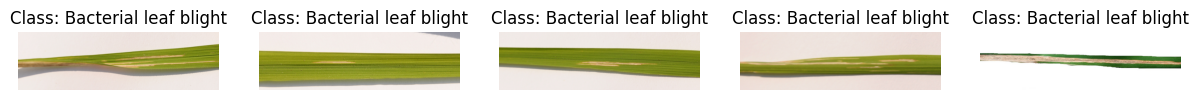

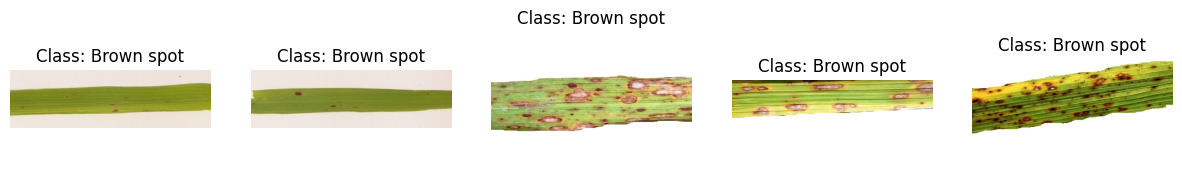

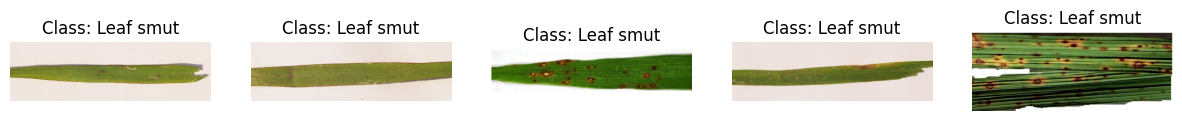

In [5]:
# Define the number of images to show from each class
num_images_to_show = 5

# Loop through each class and show the first 5 images
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(data_directory, class_name)
    class_images = os.listdir(class_dir)[:num_images_to_show]

    # Display the images
    plt.figure(figsize=(15, 3))
    for j, image_name in enumerate(class_images):
        if j >= num_images_to_show:
            break
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(1, num_images_to_show, j + 1)
        plt.imshow(img)
        plt.title(f'Class: {class_name}')
        plt.axis('off')
    plt.show()



---



---



# Data Preprocessing:

In [6]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In the provided code, data augmentation is applied to the training dataset using the ImageDataGenerator from TensorFlow.


Data augmentation is a technique commonly used in computer vision tasks, such as image classification, to artificially increase the diversity of the training dataset by applying various transformations to the existing images. The primary goal of data augmentation is to improve the generalization of machine learning models by exposing them to different variations of the input data, thus making the model more robust and less prone to overfitting.

In [7]:
# Create data generators with data augmentation for training and validation

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow(np.array(X_train), np.array(y_train), batch_size=32)
val_generator = val_datagen.flow(np.array(X_val), np.array(y_val), batch_size=32)

### The key data augmentation techniques applied in the above code are:

* Rescaling: Images are rescaled by dividing all pixel values by 255.0 to normalize them between 0 and 1.

* Rotation Range: Images are randomly rotated by up to 20 degrees.

* Width and Height Shift: Images are shifted horizontally and vertically by up to 20% of their width and height, respectively.

* Shear Range: Images are sheared by up to 20 degrees.

* Zoom Range: Images are randomly zoomed in or out by up to 20%.

* Horizontal Flip: Images are randomly horizontally flipped (left to right).

* Fill Mode: Determines the strategy to fill in newly created pixels due to transformations. In this case, "nearest" is used, which fills new pixels with the nearest pixel value.

This combination of transformations effectively increases the diversity of the training data.



---



---



# Model Creation:

There are several popular and highly effective Convolutional Neural Network (CNN) models for various computer vision tasks. Among the CNN models, several have gained fame and recognition for their performance and contributions to the field of computer vision. The most famous ones include:

1. **VGG16 and VGG19**: VGG models are known for their simplicity and effectiveness. Developed by the Visual Graphics Group at the University of Oxford, VGGNet uses small 3x3 convolutional filters with a deep architecture. VGG19 is an extension of VGG16, with more convolutional layers, leading to better feature representation. It's a deeper variant of the original VGG model.VGG16, in particular, is widely used in transfer learning due to its strong feature extraction capabilities.

2. **ResNet**: The ResNet architecture, with its residual blocks, has had a profound impact on deep learning. Developed by Kaiming He and his team, ResNet is known for its very deep architecture, and it introduced residual connections that mitigate the vanishing gradient problem. ResNet-50 and its variants are extensively used in various applications and competitions.

3. **Inception (GoogLeNet)**: Inception models introduced the idea of inception modules and are recognized for their efficiency and performance. InceptionV3 is one of the most famous versions.

4. **MobileNet**: MobileNet models are popular for mobile and embedded applications. MobileNetV2, in particular, is widely used due to its balance between speed and accuracy.

5. **EfficientNet**: EfficientNet has gained popularity for achieving state-of-the-art performance while efficiently using resources. Different variants cater to different resource constraints.

These models have not only achieved high accuracy on benchmark datasets but have also been instrumental in advancing the field of deep learning.

**For Our Project, we will be focussing on the ResNet50, VGG16 and VGG19 models.**


---



#### Model 1: ResNet50  

In [8]:
# Create a pretrained ResNet50 model
base_resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_resnet_model.layers:
    layer.trainable = False

# Create a new model on top of the pretrained base model
resnet_model = Sequential()
resnet_model.add(base_resnet_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(len(class_names), activation='softmax'))

# Compile the ResNet50 model
resnet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping_resnet = EarlyStopping(patience=5, restore_best_weights=True)

94765736/94765736 [==============================] - 1s 0us/step


#### Model 2: VGG16

In [9]:
# Create a pretrained VGG16 model
base_vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in base_vgg16_model.layers:
    layer.trainable = False

# Create a new model on top of the pretrained base model
vgg16_model = Sequential()
vgg16_model.add(base_vgg16_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(len(class_names), activation='softmax'))

# Compile the VGG16 model
vgg16_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping_vgg16 = EarlyStopping(patience=5, restore_best_weights=True)


58889256/58889256 [==============================] - 1s 0us/step


#### Model 3: VGG19

In [10]:
# Create a pretrained VGG19 model
base_vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # Use VGG19

# Freeze the convolutional layers
for layer in base_vgg19_model.layers:
    layer.trainable = False

# Create a new model on top of the pretrained base model
vgg19_model = Sequential()
vgg19_model.add(base_vgg19_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(256, activation='relu'))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(len(class_names), activation='softmax'))

# Compile the VGG19 model
vgg19_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping to prevent overfitting
early_stopping_vgg19 = EarlyStopping(patience=5, restore_best_weights=True)

80134624/80134624 [==============================] - 1s 0us/step




---



---



# Model training:

#### Model 1 :ResNet50

In [11]:
# Train the ResNet50 model
history_resnet = resnet_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping_resnet],
)

Epoch 1/20
3/3 [==============================] - 20s 7s/step - loss: 2.8844 - accuracy: 0.3789 - val_loss: 2.4822 - val_accuracy: 0.3750
Epoch 2/20
3/3 [==============================] - 14s 5s/step - loss: 2.1091 - accuracy: 0.3474 - val_loss: 1.9706 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 21s 6s/step - loss: 1.8560 - accuracy: 0.3368 - val_loss: 1.1847 - val_accuracy: 0.2917
Epoch 4/20
3/3 [==============================] - 17s 7s/step - loss: 1.5596 - accuracy: 0.3263 - val_loss: 1.2702 - val_accuracy: 0.3750
Epoch 5/20
3/3 [==============================] - 17s 7s/step - loss: 1.5391 - accuracy: 0.2632 - val_loss: 1.2657 - val_accuracy: 0.3333
Epoch 6/20
3/3 [==============================] - 19s 7s/step - loss: 1.3190 - accuracy: 0.4105 - val_loss: 1.1100 - val_accuracy: 0.3333
Epoch 7/20
3/3 [==============================] - 17s 7s/step - loss: 1.1671 - accuracy: 0.3474 - val_loss: 1.1014 - val_accuracy: 0.3750
Epoch 8/20
3/3 [==================

#### Model 2: VGG16

In [12]:
# Train the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping_vgg16],
)

Epoch 1/20
3/3 [==============================] - 46s 16s/step - loss: 1.8396 - accuracy: 0.2737 - val_loss: 1.1136 - val_accuracy: 0.5417
Epoch 2/20
3/3 [==============================] - 44s 16s/step - loss: 1.1927 - accuracy: 0.4000 - val_loss: 1.0928 - val_accuracy: 0.3333
Epoch 3/20
3/3 [==============================] - 44s 16s/step - loss: 1.1289 - accuracy: 0.4105 - val_loss: 0.8291 - val_accuracy: 0.7083
Epoch 4/20
3/3 [==============================] - 46s 17s/step - loss: 0.8877 - accuracy: 0.6105 - val_loss: 0.7984 - val_accuracy: 0.7083
Epoch 5/20
3/3 [==============================] - 45s 16s/step - loss: 0.9694 - accuracy: 0.5053 - val_loss: 0.7143 - val_accuracy: 0.7083
Epoch 6/20
3/3 [==============================] - 44s 16s/step - loss: 0.8732 - accuracy: 0.6000 - val_loss: 0.6696 - val_accuracy: 0.7917
Epoch 7/20
3/3 [==============================] - 45s 16s/step - loss: 0.7600 - accuracy: 0.6737 - val_loss: 0.6484 - val_accuracy: 0.8333
Epoch 8/20
3/3 [===========

#### Model 3: VGG19

In [13]:
# Train the VGG19 model
history_vgg19 = vgg19_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping_vgg19],
)

Epoch 1/20
3/3 [==============================] - 57s 21s/step - loss: 1.4997 - accuracy: 0.2632 - val_loss: 1.1986 - val_accuracy: 0.2917
Epoch 2/20
3/3 [==============================] - 56s 20s/step - loss: 1.2592 - accuracy: 0.4211 - val_loss: 1.0006 - val_accuracy: 0.4583
Epoch 3/20
3/3 [==============================] - 66s 25s/step - loss: 1.0247 - accuracy: 0.4947 - val_loss: 0.9175 - val_accuracy: 0.3750
Epoch 4/20
3/3 [==============================] - 66s 25s/step - loss: 0.9912 - accuracy: 0.5263 - val_loss: 0.8636 - val_accuracy: 0.5833
Epoch 5/20
3/3 [==============================] - 56s 20s/step - loss: 0.9056 - accuracy: 0.6000 - val_loss: 0.9000 - val_accuracy: 0.5417
Epoch 6/20
3/3 [==============================] - 56s 20s/step - loss: 0.9177 - accuracy: 0.5263 - val_loss: 0.8000 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 56s 20s/step - loss: 0.8742 - accuracy: 0.6000 - val_loss: 0.7470 - val_accuracy: 0.6667
Epoch 8/20
3/3 [===========



---



---



### Some of the Trained Image samples taken at random.

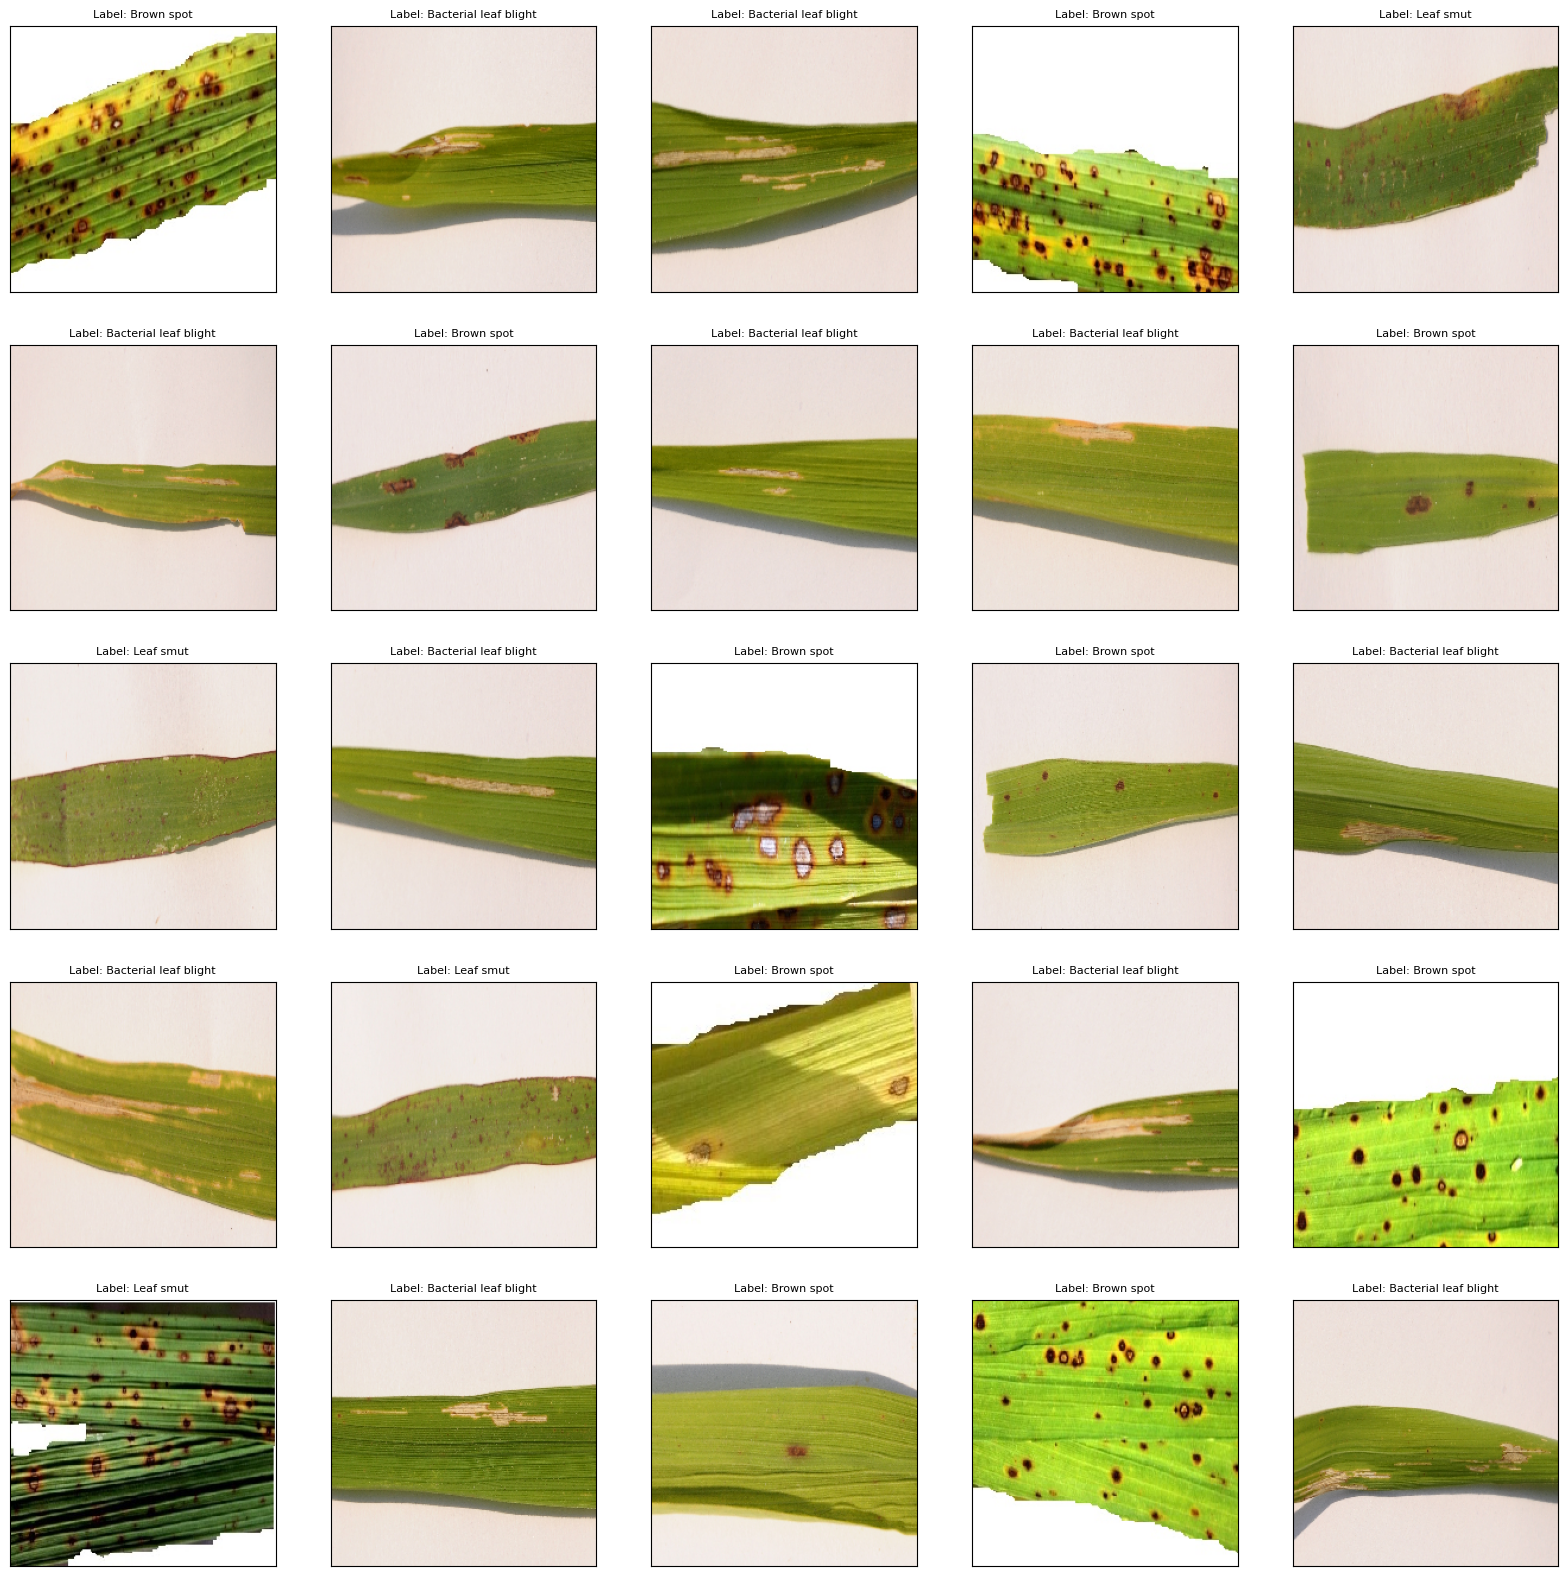

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

num_rows = 5  # Adjust the number of rows as needed
num_columns = 5  # Adjust the number of columns as needed

fig = plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
for i in range(num_rows * num_columns):
    ax = fig.add_subplot(num_rows, num_columns, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i] / 255.0)  # Rescale the image data to the range [0, 1]
    ax.set_title(f"Label: {class_names[y_train[i]]}", fontsize=8)  # Adjust fontsize as needed



---



---



# Save the Trained Models and Load it if Needed

Loading the model once the Training is complete can save a lot of time from redoing the training later.

#### Save Both the trained model


<div class="alert alert-info" role="alert">
  <p>
    <b>
    <h4 align='center'>Model Saving Guidelines</h4>
    </b>
  </p>

  <p>
    <ul>
      <li><span style="color: red">ⓧ</span> Please type "Yes" or "No" to save the model in the cell below.</li>
    </ul>
  </p>
</div>


In [15]:
# Save the trained models to the same location

user_input = input('Do you want to save the trained models? (yes/no) ')

if user_input == 'yes':
  resnet_model.save('rice_leaf_disease_resnet_model.h5')
  vgg16_model.save('rice_leaf_disease_vgg16_model.h5')
  vgg19_model.save('rice_leaf_disease_vgg19_model.h5')

  # Get the current working directory
  cwd = os.getcwd()

  # Print a message to the console indicating that the models were saved successfully and show the location of the saving folder
  print(f'Models saved successfully at :\n{cwd}')

else:
  print('Model saving skipped.')

# Continue with the next execution or stop the execution

Do you want to save the trained models? (yes/no) no
Model saving skipped.


#### Now, To Load the Model


<div class="alert alert-info" role="alert">
  <p>
    <b>
    <h4 align='center'>Model Loading Guidelines</h4>
    </b>
  </p>

  <p>
    <ul>
      <li><span style="color: red">ⓧ</span> If in colab, inorder to load the model, Please make sure the existence of (or upload) the file named 'rice_leaf_disease_model.h5' in the "files Section" in Colab.</li>
      <li><span style="color: red">ⓧ</span> This saved model can come to existence only after completing the Training phase atleast once and saving the model.</li>
      <li><span style="color: red">ⓧ</span> Please Type "Yes" or "No" to load the model in the cell below.</li>
    </ul>
  </p>
</div>


In [16]:
user_input = input('Do you want to load the models for the Project? (yes/no) ')

if user_input == 'yes':
  # Define model paths
  resnet_model_path = r'/content/rice_leaf_disease_resnet_model.h5'
  vgg16_model_path = r'/content/rice_leaf_disease_vgg16_model.h5'
  vgg19_model_path = r'/content/rice_leaf_disease_vgg19_model.h5'

  # Load the models
  resnet_model = tf.keras.models.load_model(resnet_model_path)
  vgg16_model = tf.keras.models.load_model(vgg16_model_path)
  vgg19_model = tf.keras.models.load_model(vgg19_model_path)

  # Check if the models were successfully loaded
  if resnet_model is not None and vgg16_model is not None and vgg19_model is not None:
    print('Models loaded successfully.')
  else:
    print('Failed to load models! Please Retry.')

  # Define class names
  class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

  # Continue with testing

else:
  # Skip the loading process
  print('Model loading skipped.')

Do you want to load the models for the Project? (yes/no) mo
Model loading skipped.


# Model evaluation

#### ResNet50

In [17]:
# Evaluate the ResNet50 model
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(val_generator)

print(f'ResNet50 Test Accuracy: {test_accuracy_resnet * 100:.2f}%')

1/1 [==============================] - 3s 3s/step - loss: 1.0823 - accuracy: 0.4167
ResNet50 Test Accuracy: 41.67%


#### VGG16

In [18]:
# Evaluate the VGG16 model
test_loss_vgg16, test_accuracy_vgg16 = vgg16_model.evaluate(val_generator)

print(f'VGG16 Test Accuracy: {test_accuracy_vgg16 * 100:.2f}%')

1/1 [==============================] - 9s 9s/step - loss: 0.4089 - accuracy: 0.8750
VGG16 Test Accuracy: 87.50%


#### VGG19

In [19]:
# Evaluate the VGG19 model
test_loss_vgg19, test_accuracy_vgg19 = vgg19_model.evaluate(val_generator)

print(f'VGG19 Test Accuracy: {test_accuracy_vgg19 * 100:.2f}%')

1/1 [==============================] - 11s 11s/step - loss: 0.5208 - accuracy: 0.7083
VGG19 Test Accuracy: 70.83%




---



---



# Testing Phase:


<div class="alert alert-info" role="alert">
  <p>
    <b>
    <h4 align='center'>Test Image Upload Guidelines</h4>
    </b>
  </p>

  <p>
    <ul>
      <li><span style="color: red">ⓧ</span> If in colab, to load multiple images for prediction, please create a folder at "/content' in your files section so that it becomes for example '/content/Test_images_Folder'. Please load all your test images to that folder. <br></li>
      <li><span style="color: red">ⓧ</span> Then to test the new images, replace '/content/Test_images_Folder' in the next code with the path to your test images folder.  <br></li>
    </ul>
  </p>
</div>


In [20]:
# Specify the folder containing test images
test_image_folder = '/content/Test_images_Folder'  # Replace with the path to your "test-image folder" where you have multiple test images to predict

#### ResNet50

In [21]:
# Define a function to predict the class of a test image
def predict_resnet_image_class(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)

    # Get the predicted class index and probability
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Get the predicted probability for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    return predicted_class, predicted_probability, image_path

In [22]:
# List all image files in the folder
test_image_files = [f for f in os.listdir(test_image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Initialize a counter
serial_number = 1

# Iterate through the test images and make predictions
for image_file in test_image_files:
    image_path_resnet = os.path.join(test_image_folder, image_file)
    predicted_class_resnet, predicted_probability_resnet, image_path = predict_resnet_image_class(image_path_resnet, resnet_model)

    # Print the serial number, results for each image
    print(f'{serial_number}.)')
    print(f'Test Image File Name:               {image_path_resnet}')
    print(f'Predicted class using ResNet50:     {predicted_class_resnet}')
    print(f'Prediction accuracy using ResNet50: {predicted_probability_resnet * 100:.2f}%')
    print()

    # Increment the serial number
    serial_number += 1


1/1 [==============================] - 1s 871ms/step
1.)
Test Image File Name:               /content/Test_images_Folder/smutDSC_0313.jpg
Predicted class using ResNet50:     Brown spot
Prediction accuracy using ResNet50: 35.75%

1/1 [==============================] - 0s 144ms/step
2.)
Test Image File Name:               /content/Test_images_Folder/Brown spot DSC_0108.jpg
Predicted class using ResNet50:     Brown spot
Prediction accuracy using ResNet50: 38.82%

1/1 [==============================] - 0s 127ms/step
3.)
Test Image File Name:               /content/Test_images_Folder/Brown spot - not sure WhatsApp Image 2023-09-08 at 19.29.03.jpg
Predicted class using ResNet50:     Brown spot
Prediction accuracy using ResNet50: 38.35%

1/1 [==============================] - 0s 138ms/step
4.)
Test Image File Name:               /content/Test_images_Folder/brownDSC_0107.jpg
Predicted class using ResNet50:     Brown spot
Prediction accuracy using ResNet50: 38.51%

1/1 [========================

#### VGG16

In [23]:
def predict_vgg16_image_class(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)

    # Get the predicted class index and probability
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Get the predicted probability for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    return predicted_class, predicted_probability

In [24]:
# List all image files in the folder
test_image_files = [f for f in os.listdir(test_image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Initialize a counter
serial_number = 1

# Iterate through the test images and make predictions
for image_file in test_image_files:
    image_path_vgg16 = os.path.join(test_image_folder, image_file)
    predicted_class_vgg16, predicted_probability_vgg16 = predict_vgg16_image_class(image_path_vgg16, vgg16_model)

    # Print the serial number and results for each image
    print(f'{serial_number}.)')
    print(f'Test Image File Name:               {image_path_vgg16}')
    print(f'Predicted class using VGG16:        {predicted_class_vgg16}')
    print(f'Prediction accuracy using VGG16:    {predicted_probability_vgg16 * 100:.2f}%')
    print()

    # Increment the serial number
    serial_number += 1


1/1 [==============================] - 0s 475ms/step
1.)
Test Image File Name:               /content/Test_images_Folder/smutDSC_0313.jpg
Predicted class using VGG16:        Leaf smut
Prediction accuracy using VGG16:    93.59%

1/1 [==============================] - 0s 377ms/step
2.)
Test Image File Name:               /content/Test_images_Folder/Brown spot DSC_0108.jpg
Predicted class using VGG16:        Brown spot
Prediction accuracy using VGG16:    98.12%

1/1 [==============================] - 0s 369ms/step
3.)
Test Image File Name:               /content/Test_images_Folder/Brown spot - not sure WhatsApp Image 2023-09-08 at 19.29.03.jpg
Predicted class using VGG16:        Brown spot
Prediction accuracy using VGG16:    93.25%

1/1 [==============================] - 0s 384ms/step
4.)
Test Image File Name:               /content/Test_images_Folder/brownDSC_0107.jpg
Predicted class using VGG16:        Brown spot
Prediction accuracy using VGG16:    99.39%

1/1 [=========================

#### VGG19

In [25]:
def predict_vgg19_image_class(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    predictions = model.predict(img_array)

    # Get the predicted class index and probability
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_names[predicted_class_index]

    # Get the predicted probability for the predicted class
    predicted_probability = predictions[0][predicted_class_index]

    return predicted_class, predicted_probability


In [26]:
# List all image files in the folder
test_image_files = [f for f in os.listdir(test_image_folder) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Initialize a counter
serial_number = 1

# Iterate through the test images and make predictions
for image_file in test_image_files:
    image_path_vgg19 = os.path.join(test_image_folder, image_file)
    predicted_class_vgg19, predicted_probability_vgg19 = predict_vgg19_image_class(image_path_vgg19, vgg19_model)

    # Print the serial number and results for each image
    print(f'{serial_number}.)')
    print(f'Test Image File Name:               {image_path_vgg19}')
    print(f'Predicted class using VGG19:        {predicted_class_vgg19}')
    print(f'Prediction accuracy using VGG19:    {predicted_probability_vgg19 * 100:.2f}%')
    print()

    # Increment the serial number
    serial_number += 1


1/1 [==============================] - 1s 571ms/step
1.)
Test Image File Name:               /content/Test_images_Folder/smutDSC_0313.jpg
Predicted class using VGG19:        Leaf smut
Prediction accuracy using VGG19:    84.52%

1/1 [==============================] - 0s 467ms/step
2.)
Test Image File Name:               /content/Test_images_Folder/Brown spot DSC_0108.jpg
Predicted class using VGG19:        Brown spot
Prediction accuracy using VGG19:    98.46%

1/1 [==============================] - 0s 463ms/step
3.)
Test Image File Name:               /content/Test_images_Folder/Brown spot - not sure WhatsApp Image 2023-09-08 at 19.29.03.jpg
Predicted class using VGG19:        Brown spot
Prediction accuracy using VGG19:    92.45%

1/1 [==============================] - 1s 517ms/step
4.)
Test Image File Name:               /content/Test_images_Folder/brownDSC_0107.jpg
Predicted class using VGG19:        Brown spot
Prediction accuracy using VGG19:    98.46%

1/1 [=========================



---



---



# Model Comparison Report

Create a report stating the performance of multiple models on this data and suggest the best model for production.

Comarison Report In a Different Format

Table summary:
      Model  Train Accuracy  Validation Accuracy  Train Loss  Validation Loss
0     VGG16        0.863158             0.875000    0.399796         0.408932
1     VGG19        0.726316             0.708333    0.623607         0.520766
2  ResNet50        0.431579             0.333333    1.087654         1.094031


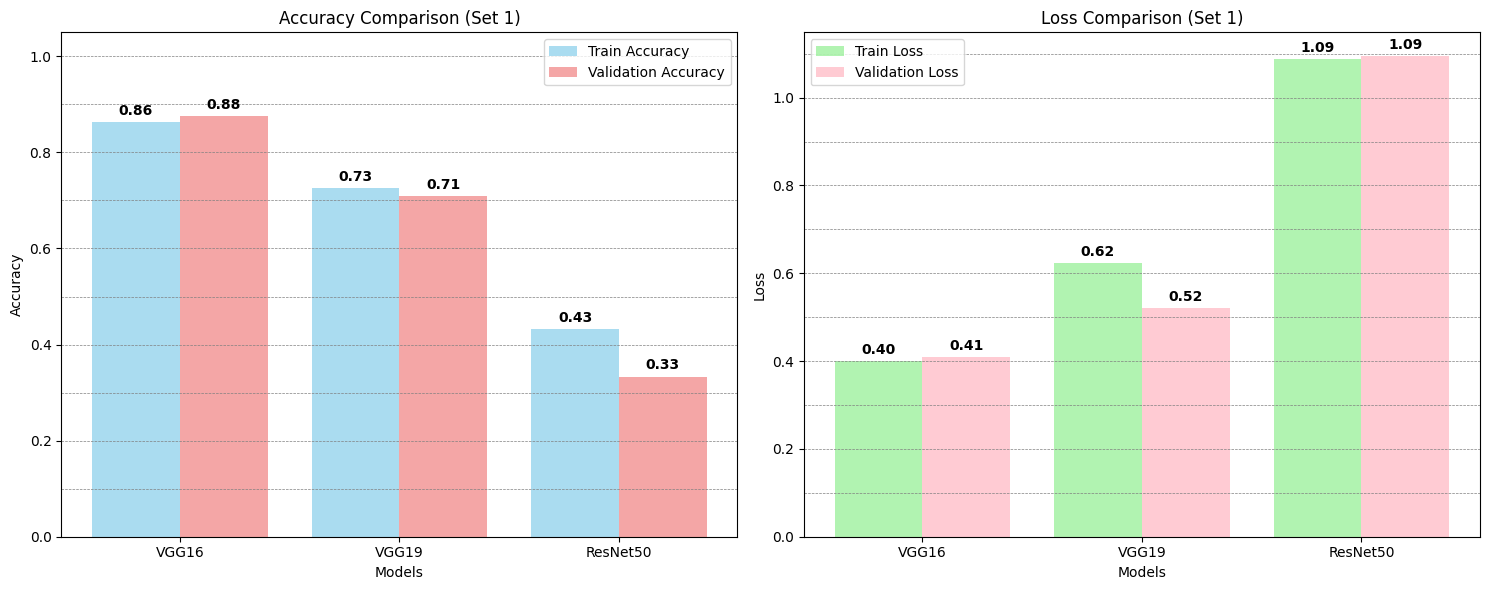

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Initialize lists to store model names and their corresponding histories
model_names = ['VGG16', 'VGG19', 'ResNet50']
model_histories = [history_vgg16, history_vgg19, history_resnet]

# Initialize dictionaries to store evaluation metrics
model_metrics = {'Model': model_names}
model_metrics['Train Accuracy'] = []
model_metrics['Validation Accuracy'] = []
model_metrics['Train Loss'] = []
model_metrics['Validation Loss'] = []

# Create a figure with two subplots: one for accuracy and one for loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Iterate through the models and their histories
for model_name, history in zip(model_names, model_histories):
    # Extract relevant metrics for the first set of metrics
    training_accuracy = history.history['accuracy'][-1]
    validation_accuracy = history.history['val_accuracy'][-1]
    training_loss = history.history['loss'][-1]
    validation_loss = history.history['val_loss'][-1]

    # Append metrics to the dictionaries for the first set of metrics
    model_metrics['Train Accuracy'].append(training_accuracy)
    model_metrics['Validation Accuracy'].append(validation_accuracy)
    model_metrics['Train Loss'].append(training_loss)
    model_metrics['Validation Loss'].append(validation_loss)

    # Extract relevant metrics for the second set of metrics
    accuracy = history.history['accuracy'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]

# Plot accuracy comparison for the first set of metrics
index = np.arange(len(model_names))
bar_width = 0.4

bars1 = ax1.bar(index - bar_width / 2, model_metrics['Train Accuracy'], bar_width, label='Train Accuracy', color='skyblue', alpha=0.7)
bars2 = ax1.bar(index + bar_width / 2, model_metrics['Validation Accuracy'], bar_width, label='Validation Accuracy', color='lightcoral', alpha=0.7)

ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison (Set 1)')
ax1.set_xticks(index)
ax1.set_xticklabels(model_names)
ax1.legend()

# Add values on top of each bar in bold
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add horizontal reference lines for accuracy
reference_values_acc = np.arange(0.0, 1.1, 0.1)
for ref in reference_values_acc:
    ax1.axhline(ref, color='gray', linestyle='--', linewidth=0.5)

# Plot loss comparison for the second set of metrics
bars3 = ax2.bar(index - bar_width / 2, model_metrics['Train Loss'], bar_width, label='Train Loss', color='lightgreen', alpha=0.7)
bars4 = ax2.bar(index + bar_width / 2, model_metrics['Validation Loss'], bar_width, label='Validation Loss', color='lightpink', alpha=0.7)

ax2.set_xlabel('Models')
ax2.set_ylabel('Loss')
ax2.set_title('Loss Comparison (Set 1)')
ax2.set_xticks(index)
ax2.set_xticklabels(model_names)

# Move the legend to the left side (upper left in this case)
ax2.legend(loc='upper left')

# Add values on top of each bar in bold
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                     textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add horizontal reference lines for loss
reference_values_loss = np.arange(0.0, max(model_metrics['Train Loss']) + 0.1, 0.1)
for ref in reference_values_loss:
    ax2.axhline(ref, color='gray', linestyle='--', linewidth=0.5)

# Display the comparison table for the first set of metrics
model_df = pd.DataFrame(model_metrics)
print("Table summary:")
print(model_df)

# You can also write the model_df to a CSV file for inclusion in your report
model_df.to_csv('model_comparison_set1.csv', index=False)

plt.tight_layout()
plt.show()

#### Insights (subject to change based on training )

* VGG16 achieved the highest training accuracy and the highest validation accuracy. It also had the lowest training loss and validation loss. This indicates that VGG16 is the best choice if you prioritize training accuracy, but it might slightly overfit the data as indicated by the higher validation loss.

* VGG19 achieved a competitive training accuracy and validation accuracy just below VGG16 model. It had a relatively high training loss and validation loss that VGG16. This suggests that VGG19 might be overfitting the data more compared to the VGG16 model.

* ResNet50 performed the worst in terms of both training accuracy and validation accuracy. It also had a high training loss and a high validation loss. This indicates that ResNet50 may not be well-suited for this dataset, possibly due to limited training data or other factors.

### Model Choice

##### **We have opted to choose VGG16 as the best model for our Project. This is because**

* VGG16 appears to be the best-performing model among the three for this dataset, with a good balance between training and validation accuracy and relatively low loss.
* VGG19, while competitive in training accuracy, seems to suffer from overfitting as indicated by its lower validation accuracy and higher loss.
* ResNet50 does not perform well on this dataset and may require further investigation or additional data preprocessing.



---



---



# Conclusion
In this project, we've used advanced technology to help farmers protect their rice crops from diseases. We gathered a collection of images of rice leaves affected by common diseases like leaf smut, brown spot, and bacterial leaf blight.

Our Project above does the following:
load and preprocess the dataset, split it into training and validation sets,  use data augmentation for better training, and employ some pretrained CNN Models like VGG16, VGG19 and ResNet50 models for feature extraction and Training. It also includes early stopping to prevent overfitting.

We have come to the conclusion **to choose the model VGG16 as our final model.**

Our project is a helping hand to farmers, allowing them to identify and tackle rice diseases more efficiently. We hope this technology will contribute to healthier rice crops and more food for everyone.



---



---



# Report on Challenges faced

* <b>Data Quantity:</b>

<i>Challenge:</i> We had a small quantity of datset images to train accurate CNN models. \
<i>Technique Used:</i> Transfer learning was employed, utilizing pre-trained CNN models such as VGG16, VGG19, and ResNet50. This approach allowed us to leverage knowledge from models trained on extensive datasets and fine-tune them for our specific task.

* <b>Model Selection:</b>

<i>Challenge:</i> Choosing the most suitable CNN model required some experimentation and evaluation. \
<i>Technique Used:</i> We conducted model selection experiments by training different CNN architectures and evaluating their performance. The models with the best representative validation accuracy was chosen for the task.

* <b>Overfitting:</b>

<i>Challenge:</i> Models had a tendency to overfit, performing well on the training data but poorly on new data. \
<i>Technique Used:</i> To mitigate overfitting, we implemented early stopping, a technique that monitored the validation loss and stopped training when it began to increase. This helped prevent the models from becoming too specialized on the training data.



---



---



<h1 align='center'><b>End of Project. Thank You!</b></font></h1>